Анализ рынка компьютерных игр


Данный проект направлен на изучение рынка компьютерных игр и платформ. 
Основные метрики исследования - платформы, жанры игр, оценки критиков, пользователей, данные по продажам.

Цель проекта проверить какие категории рабочие и на каких категориях делать упор в развитии в 2017 году. 

Шаг 1. Откройте файл с данными и изучите общую информацию


In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


data = pd.read_csv('/datasets/games.csv')


Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);

In [2]:
print(data.info())
print()
print(data.head(10))
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating' })
print()
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario

Определяем и заменяем тип данных.

- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [3]:
print()
print(data.info())
print(data.head(3))
print()
print(data['year_of_release'].unique())
data['year_of_release'] = data['year_of_release'].fillna(0)
print()
print(data['year_of_release'].unique())
print()
data['year_of_release'] = data['year_of_release'].astype('int')
print()
print(data['user_score'].unique())
print()
print(data.head(10))
data['user_score'] = data['user_score'].replace('tbd', np.nan)

print()
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                name platform  year_of_release     genre  na_sales  eu_sales  \
0         Wii Sports      Wii           2006.0    Sports     41.36     28.96   
1  Super Mario Bros.      NES           1985.0  Platform     29.08      3.5

year_of_release  - замена на int - потому что года не могут быть дробными
user_score - оценка, может быть дробной, заменил текстовое значение на пропуск, так как это явно ошибка. 

TBD - To Be Determined  - насколько я понимаю, что в данном контексте у игры еще нет оценок, поэтому решил удалить, что бы не было проблем с обработкой оценок. 

In [4]:
# код ревьюера
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Заполняем пропуски

Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

In [5]:
print('Заполняем пропуски')

data = data.drop_duplicates().reset_index(drop=True) 
print(data.info())

Заполняем пропуски
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
None


Ищем неявные дубликаты.
В текстовых солбцах
name             
platform         
genre            
rating           

In [6]:
print(data['name'].unique())
print(data['platform'].unique())
print(data['genre'].unique())
print(data['rating'].unique())


['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Судя по всему дубликатов нет. Названия пришлось открыть отдельно, так как сюда оно не влезает для проверки

In [7]:
print('поиск пустых')
print(data.isna().sum())
print()
data = data.dropna(subset=['name'])
print()
print(data.isna().sum())


поиск пустых
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64


Удалил строки, где пыстые игры, потому что без понимания, что за игра, они не несут нужной информации.
в critic_score,user_score - остваил без изменений, так как не все пользователи оставляют оценки

In [8]:
data['rating'] = data['rating'].fillna('no_rating')
print(data['rating'].unique())


['E' 'no_rating' 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


Оставлю без изменения стобце - rating_nan - удалять массив нет смысла, так как выпадает большой объем данных, а по заменам нет приемлимого варианта. 

Считаем сумарные продажи

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [9]:
print('Считаем сумарные продажи')
print()

data['sum_total'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
print(data.head())

Считаем сумарные продажи

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score     rating  \
0     28.96      3.77         8.45          76.0          8          E   
1      3.58      6.81         0.77           NaN        NaN  no_rating   
2     12.76      3.79         3.29          82.0        8.3          E   
3     10.93      3.28         2.95          80.0          8          E   
4      8.89     10.22         1.00           NaN        NaN  no_rating   

   sum_total  
0      82.54  
1      40.24

Шаг 3. Проведите исследовательский анализ данных

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?


Смотрим, количество игр по годам

In [10]:
print(data.groupby('year_of_release')['name'].count())

year_of_release
0        269
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


Думаю, что для прогноза на 2017 надо брать периоды за последние года, где не было всплесков и перекосов. То есть от 2013 -2016. 

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?


In [11]:
print('Ищем топ платформы')
print()
print(data.groupby('platform')['sum_total'].count().sort_values(ascending = False).head(10))

Ищем топ платформы

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: sum_total, dtype: int64


Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

['Wii' 'DS' 'X360' 'PS3' 'PS2' 'GBA' 'PS' 'XB' 'PC' 'PSP']

                                                          unique
year_of_release                                                 
0                [PS2, Wii, X360, GBA, PC, PS3, PS, PSP, XB, DS]
1985                                                    [PC, DS]
1988                                                        [PC]
1992                                                        [PC]
1994                                                    [PC, PS]
1995                                                    [PC, PS]
1996                                                    [PS, PC]
1997                                                    [PS, PC]
1998                                                    [PS, PC]
1999                                                    [PS, PC]
2000                                      [PS, PS2, PC, XB, GBA]
2001                                      [PS2, XB, GBA, PS, PC]
2002                          

Text(0.5, 1.0, 'gba')

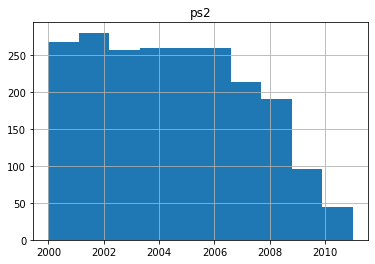

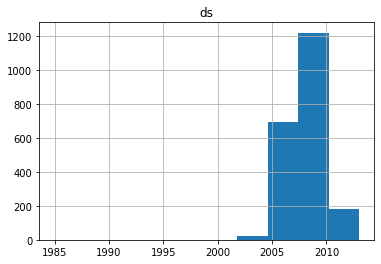

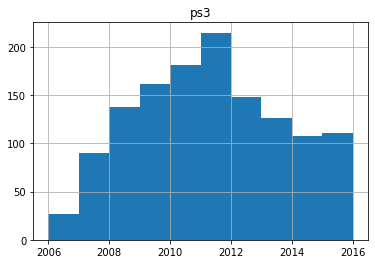

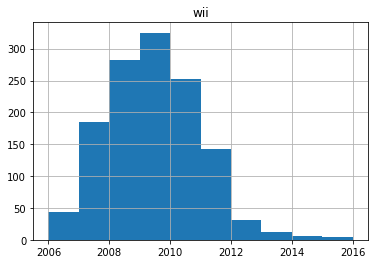

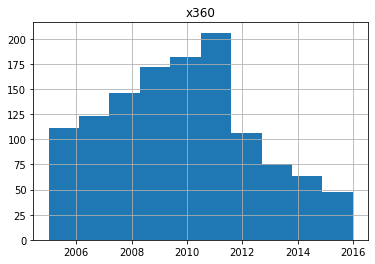

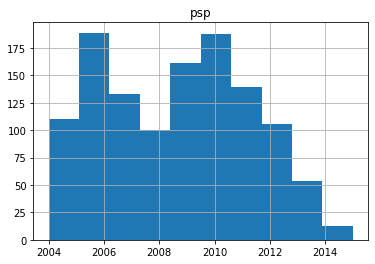

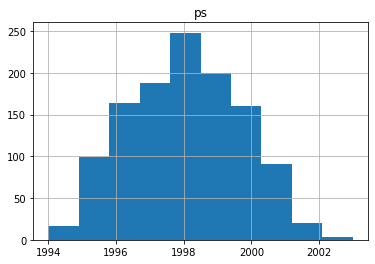

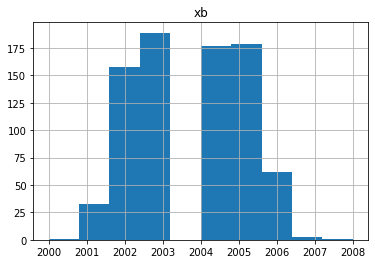

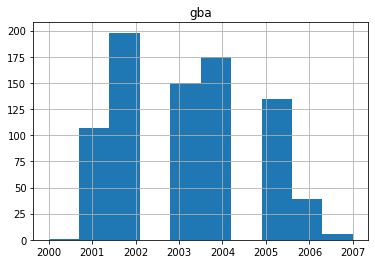

In [12]:
top_platforms = ['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB','GBA']
data_top = data.query('platform in @top_platforms')
print(data_top['platform'].unique())
print()
print(data_top.groupby(['year_of_release']).agg(unique=('platform', 'unique')))

ps2 = data[((data['platform'] == 'PS2') & (data['year_of_release'] != 0))] 
ds = data[((data['platform'] == 'DS') & (data['year_of_release'] != 0))] 
ps3 = data[((data['platform'] == 'PS3') & (data['year_of_release'] != 0))] 
wii = data[((data['platform'] == 'Wii') & (data['year_of_release'] != 0))] 
x360 = data[((data['platform'] == 'X360') & (data['year_of_release'] != 0))] 
psp = data[((data['platform'] == 'PSP') & (data['year_of_release'] != 0))] 
ps = data[((data['platform'] == 'PS') & (data['year_of_release'] != 0))] 
xb = data[((data['platform'] == 'XB') & (data['year_of_release'] != 0))] 
gba = data[((data['platform'] == 'GBA') & (data['year_of_release'] != 0))] 



ps2.hist(column = 'year_of_release');
plt.title('ps2')
ds.hist(column = 'year_of_release');
plt.title('ds')
ps3.hist(column = 'year_of_release');
plt.title('ps3')
wii.hist(column = 'year_of_release');
plt.title('wii')
x360.hist(column = 'year_of_release');
plt.title('x360')
psp.hist(column = 'year_of_release');
plt.title('psp')
ps.hist(column = 'year_of_release');
plt.title('ps')
xb.hist(column = 'year_of_release');
plt.title('xb')
gba.hist(column = 'year_of_release');
plt.title('gba')


Определяем сколько живет 1 платформа 

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [13]:
data_platform_life = data_top[['platform','year_of_release']].drop_duplicates().reset_index(drop=True)

print(data_platform_life.groupby('platform').count())
print(data_platform_life.groupby('platform').count().median())
print(data_platform_life.groupby('platform').count().mean())

          year_of_release
platform                 
DS                     12
GBA                     9
PC                     27
PS                     11
PS2                    13
PS3                    12
PSP                    13
Wii                    12
X360                   13
XB                     10
year_of_release    12.0
dtype: float64
year_of_release    13.2
dtype: float64


Платформы с наибольшими продажами живет примерно 9-13 лет. Пиковые продажи приходят на первые 4 года.

Для актуального периода выберем 2013-2016 года

Отрезаем таблицу

In [14]:
print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score     rating  \
0     28.96      3.77         8.45          76.0          8          E   
1      3.58      6.81         0.77           NaN        NaN  no_rating   
2     12.76      3.79         3.29          82.0        8.3          E   
3     10.93      3.28         2.95          80.0          8          E   
4      8.89     10.22         1.00           NaN        NaN  no_rating   

   sum_total  
0      82.54  
1      40.24  
2      35.52  
3      3

In [15]:
data = data[data['year_of_release'] >= 2013]
print(data['year_of_release'].unique())
print()
print(data['platform'].unique())


[2013 2015 2014 2016]

['PS3' 'X360' 'PS4' '3DS' 'XOne' 'WiiU' 'Wii' 'PC' 'PSV' 'DS' 'PSP']


Поиск лидеров рынка

In [16]:
print(data.groupby(['year_of_release', 'platform']).agg(sum=('sum_total', 'sum')))
print()
print(data.groupby(['platform']).agg(sum=('sum_total', 'sum')).sort_values('sum', ascending = False))

                             sum
year_of_release platform        
2013            3DS        56.57
                DS          1.54
                PC         12.38
                PS3       113.25
                PS4        25.99
                PSP         3.14
                PSV        10.59
                Wii         8.59
                WiiU       21.65
                X360       88.58
                XOne       18.96
2014            3DS        43.76
                PC         13.28
                PS3        47.76
                PS4       100.00
                PSP         0.24
                PSV        11.90
                Wii         3.75
                WiiU       22.03
                X360       34.74
                XOne       54.07
2015            3DS        27.78
                PC          8.52
                PS3        16.82
                PS4       118.90
                PSP         0.12
                PSV         6.25
                Wii         1.14
          

Из наиболее прибыльных платформ - PS4, PS3,XOne,3DS,X360

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

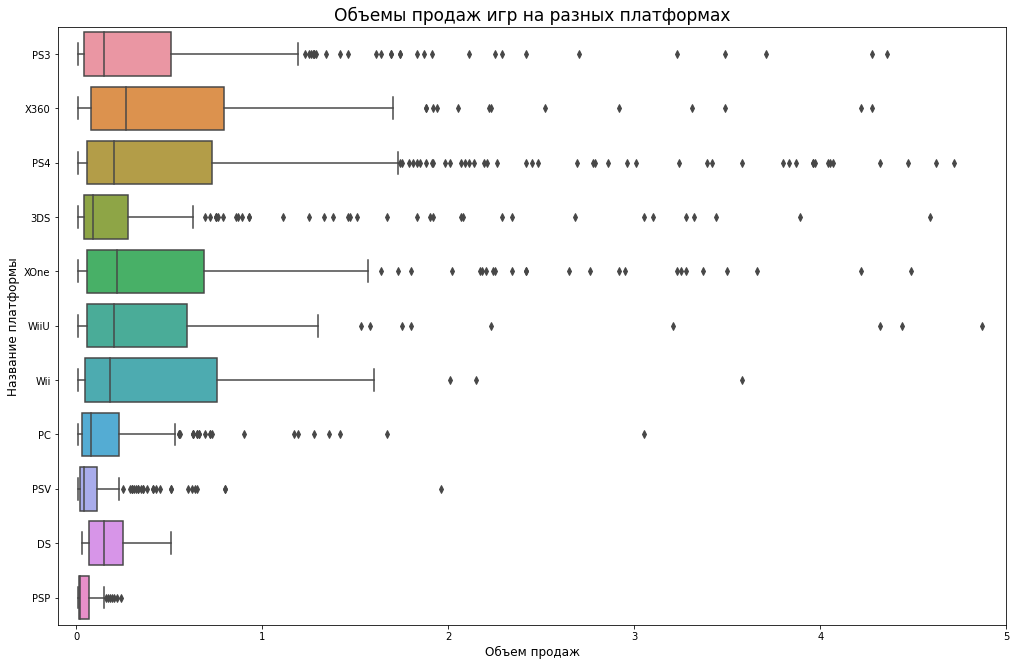

In [17]:
import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=data, y='platform', x='sum_total')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

Как видно из графика наибольшее количество копий игр продано на PS4 и Х360. На эти платформы также в среднем приходится наибольшее среднее количество проданных копий.

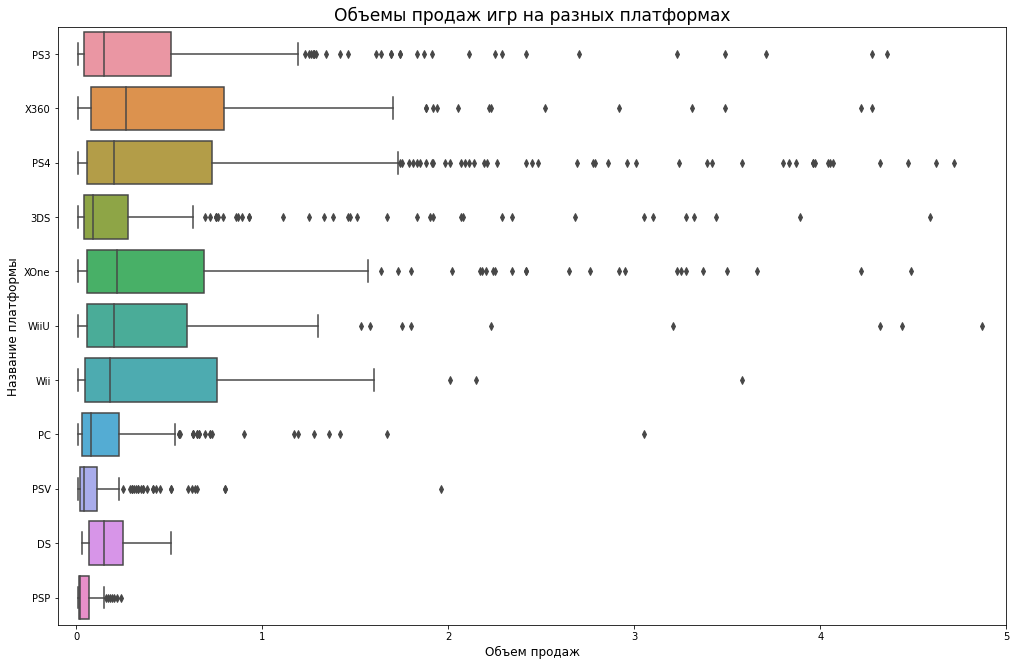

In [18]:
# код ревьюера
import seaborn as sns

plt.figure(figsize=(17, 11))
sns.boxplot(data=data, y='platform', x='sum_total')
plt.xlim(-0.1, 5)

plt.title('Объемы продаж игр на разных платформах', size=17)
plt.xlabel('Объем продаж', size=12)
plt.ylabel('Название платформы', size=12)

plt.show()

In [19]:
print('анализ ps4')
print()
print(data['user_score'].unique())
ps4 = data[(data['platform'] == 'PS4') & (data['user_score'] != 'tbd')].dropna()
ps4['user_score'] = ps4['user_score'].astype('float')
print(ps4['user_score'].unique())

print(ps4.head(10))
ps4.info()

анализ ps4

['8.2' '8.1' nan '8.3' '2.6' '4.3' '5.7' '5' '6.5' '9.1' '6.1' '7.9' '5.4'
 '8.4' '6.4' '3.4' '8.5' '4.8' '9' '4.9' '4.5' '6.2' '4.2' '6.3' '7.7'
 '9.2' '7.6' '8.7' '6.7' '3.7' '7' '6.9' '4.1' '5.8' '5.6' '6.8' '5.5'
 '7.5' '4.4' '5.9' '7.2' '8.9' '3.9' '7.8' '3.2' '8.6' '3.1' '7.4' '7.3'
 '6.6' '6' '4.7' '7.1' '8.8' '5.1' '3' '2.9' '2.7' '2.2' '8' '3.5' '5.2'
 '5.3' '3.8' '4.6' '3.3' '9.3' '4' '3.6' '2.4' '2.8' '1.8' '1.7' '1.6'
 '2.1' '2' '1.5' '0.7' '2.5' '0.2' '1.9' '1.3' '1' '1.4' '2.3']
[8.3 4.3 5.7 5.  6.5 6.1 7.9 8.1 3.4 8.4 6.3 7.7 9.2 4.9 7.6 6.7 3.7 7.
 6.9 8.2 6.8 5.9 7.8 8.6 7.3 7.4 6.2 6.  7.1 5.1 6.6 5.4 4.5 8.8 8.5 5.2
 7.2 7.5 5.5 3.6 5.6 8.  8.7 5.8 3.8 4.7 3.3 2.7 2.  1.5 4.1 6.4 2.9 1.9
 3.5 2.3]
                                       name platform  year_of_release  \
42                       Grand Theft Auto V      PS4             2014   
77                                  FIFA 16      PS4             2015   
92           Call of Duty: Advanced Warfare

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

0.40589480145836687
-0.03362497596528878


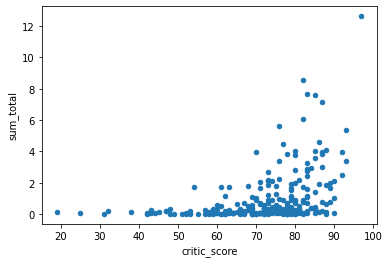

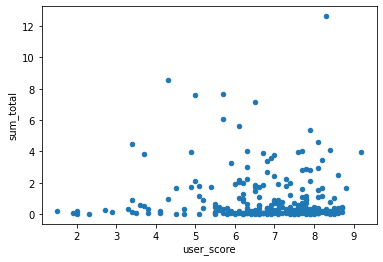

In [20]:
ps4.plot(x='critic_score', y='sum_total', kind='scatter');
ps4.plot(x='user_score', y='sum_total', kind='scatter');
print(ps4['critic_score'].corr(ps4['sum_total']))
print(ps4['user_score'].corr(ps4['sum_total']))


судя по графикам критики точнее оценивают игры, чем выше оценка критиков, тем больше продаются игры. У пользователей бывают игры, которые даже с низкими оценками хорошо продаются.


Соотнесите выводы с продажами игр на других платформах.

0.3116921831260645
-0.004063660293396326


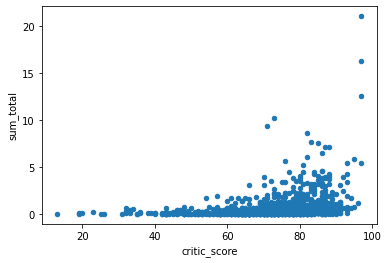

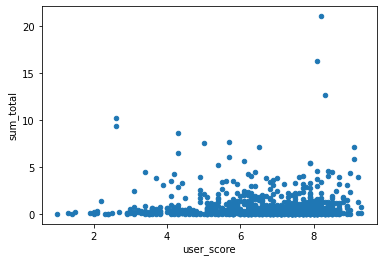

In [21]:
data1 = data[data['user_score'] != 'tbd'].dropna()
data1['user_score'] = data1['user_score'].astype('float')
data1.plot(x='critic_score', y='sum_total', kind='scatter');
print(data1['critic_score'].corr(data1['sum_total']))
data1.plot(x='user_score', y='sum_total', kind='scatter');
print(data1['user_score'].corr(data1['sum_total']))

Судя по диаграмме тенденция схожа на всех популярных платформах

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

                 sum
genre               
Action        321.87
Shooter       232.98
Sports        150.65
Role-Playing  145.89
Misc           62.82
Platform       42.63
Racing         39.89
Fighting       35.31
Adventure      23.64
Simulation     21.76
Strategy       10.08
Puzzle          3.17
                 sum  game_count  mean_1_game
genre                                        
Adventure      23.64         245    10.363790
Strategy       10.08          56     5.555556
Puzzle          3.17          17     5.362776
Simulation     21.76          62     2.849265
Misc           62.82         155     2.467367
Action        321.87         766     2.379843
Fighting       35.31          80     2.265647
Racing         39.89          85     2.130860
Role-Playing  145.89         292     2.001508
Platform       42.63          74     1.735867
Sports        150.65         214     1.420511
Shooter       232.98         187     0.802644


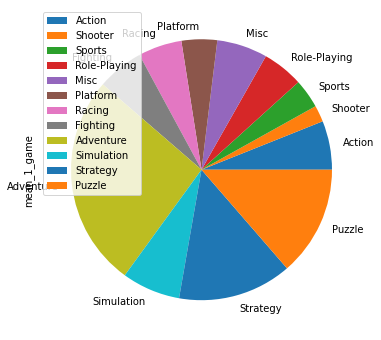

In [22]:
print(data.groupby(['genre']).agg(sum=('sum_total', 'sum')).sort_values('sum', ascending = False))

data_genre = data.groupby(['genre']).agg(sum=('sum_total', 'sum'), game_count=('name', 'count')).sort_values('sum', ascending = False)
data_genre['mean_1_game'] = data_genre['game_count']/data_genre['sum']
print(data_genre.sort_values('mean_1_game', ascending = False))
data_genre.plot.pie(y='mean_1_game', figsize=(11, 6),subplots=True);

Top 3 продаваемых жанра - Action, Shooter, Sports. Не смотря на это, вес одной игры наиболее значим в жанрах -  Adventure, Strategy, Puzzle

Шаг 4. Составьте портрет пользователя каждого региона


Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

           total      na      eu     jp   na_diff   eu_diff   jp_diff
platform                                                             
PS4       314.14  108.74  141.09  15.96  0.248429  0.359712  0.113368
PS3       181.43   63.50   67.81  23.35  0.145073  0.172883  0.165862
XOne      159.32   93.12   51.59   0.34  0.212744  0.131530  0.002415
3DS       143.25   38.20   30.96  67.81  0.087272  0.078933  0.481674
X360      136.80   81.66   42.52   0.51  0.186562  0.108406  0.003623


Text(0.5, 1.0, 'jp_diff')

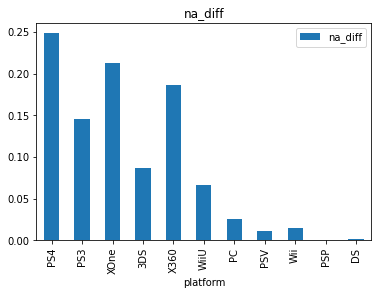

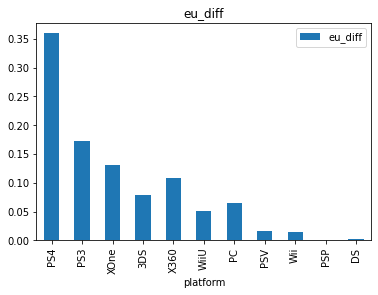

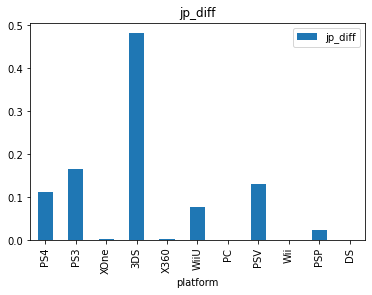

In [23]:
platform = data.groupby(['platform']).agg(total=('sum_total', 'sum'), na=('na_sales', 'sum'), eu=('eu_sales', 'sum'), jp=('jp_sales', 'sum')).sort_values('total', ascending = False)
platform['na_diff'] = platform['na']/(platform['na'].sum())
platform['eu_diff'] = platform['eu']/(platform['eu'].sum())
platform['jp_diff'] = platform['jp']/(platform['jp'].sum())
print(platform.head())

platform.plot.bar(y='na_diff');
plt.title('na_diff')
platform.plot.bar(y='eu_diff');
plt.title('eu_diff')
platform.plot.bar(y='jp_diff');
plt.title('jp_diff')




В американском и европейском регионе топ 1 попродажам занимает ps4, в японии 3DS.

               total      na      eu     jp
genre                                      
Action        321.87  126.05  118.13  40.49
Shooter       232.98  109.74   87.86   6.61
Sports        150.65   65.27   60.52   5.41
Role-Playing  145.89   46.40   36.97  51.04
Misc           62.82   27.49   20.04   9.20
Platform       42.63   18.14   15.58   4.79
Racing         39.89   12.96   20.19   2.30
Fighting       35.31   15.55    8.55   7.65
Adventure      23.64    7.14    8.25   5.82
Simulation     21.76    4.86   10.92   4.52
Strategy       10.08    3.28    4.22   1.77
Puzzle          3.17    0.83    1.00   1.18


Text(0.5, 1.0, 'jp')

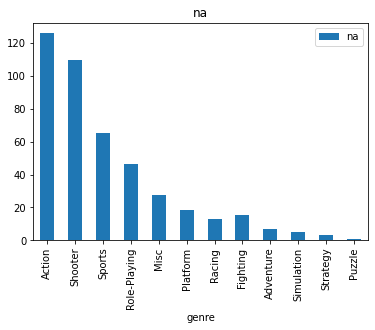

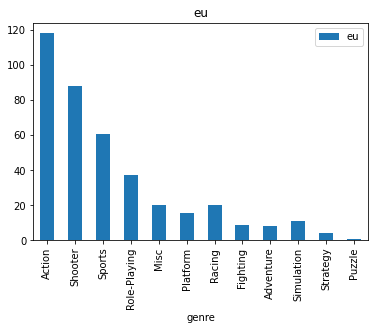

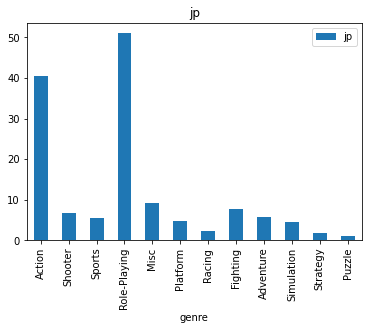

In [24]:
print(data.groupby(['genre']).agg(total=('sum_total', 'sum'), na=('na_sales', 'sum'), eu=('eu_sales', 'sum'), jp=('jp_sales', 'sum')).sort_values('total', ascending = False))
genre = data.groupby(['genre']).agg(total=('sum_total', 'sum'), na=('na_sales', 'sum'), eu=('eu_sales', 'sum'), jp=('jp_sales', 'sum')).sort_values('total', ascending = False)
genre.plot.bar(y='na');
plt.title('na')
genre.plot.bar(y='eu');
plt.title('eu')
genre.plot.bar(y='jp');
plt.title('jp')

TOP 5 самых популярных жанров в европе и америке - Action, Shooter, Sports, Role-playing, Misc. 

В Японии наиболее успешные жанры, это Action и Role-Playing

            total      na      eu     jp
rating                                  
M          371.68  165.21  145.32  14.11
no_rating  276.84   89.42   78.91  85.05
E          200.16   79.05   83.36  15.14
T          126.62   49.79   41.95  20.59
E10+       115.39   54.24   42.69   5.89


Text(0.5, 1.0, 'jp')

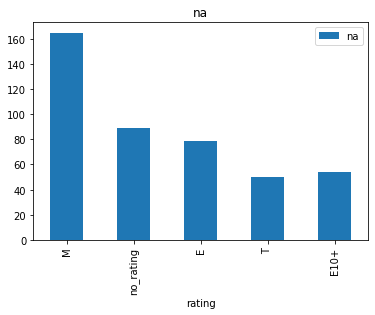

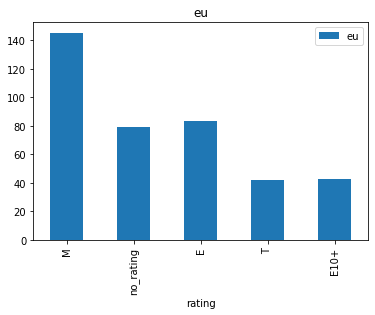

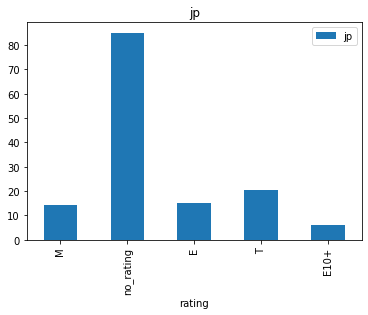

In [25]:
print(data.groupby(['rating']).agg(total=('sum_total', 'sum'), na=('na_sales', 'sum'), eu=('eu_sales', 'sum'), jp=('jp_sales', 'sum')).sort_values('total', ascending = False))
rating = data.groupby(['rating']).agg(total=('sum_total', 'sum'), na=('na_sales', 'sum'), eu=('eu_sales', 'sum'), jp=('jp_sales', 'sum')).sort_values('total', ascending = False)
rating.plot.bar(y='na');
plt.title('na')
rating.plot.bar(y='eu');
plt.title('eu')
rating.plot.bar(y='jp');
plt.title('jp')

Необычные продажи есть только в Японии, где наиболее предпочтительные категории no_rating.

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

0я гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [26]:
data_hip = data[data['user_score'] != 'tbd'].dropna(subset=['user_score'])
data_hip['user_score'] = data_hip['user_score'].astype('float')

xone = data_hip[data_hip['platform']=='XOne']['user_score']
pc = data_hip[data_hip['platform']=='PC']['user_score']

alpha = .05
results = st.ttest_ind(xone, pc, equal_var = False)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Рейтинг игр на Х360 и ПК разный

Гипотеза - X360 и PC имеют схожий рейтнг - значение расхождения больше допустимого - гипотеза не подтвердилась

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

0я гипотеза = Средние пользовательские рейтинги жанров Action и Sports одинаковые.


In [27]:
action = data_hip[data_hip['genre']=='Action']['user_score']
shooter = data_hip[data_hip['genre']=='Shooter']['user_score']

alpha = .05
results = st.ttest_ind(action, shooter, equal_var = False)

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


0.00032050491803798287
Отвергаем нулевую гипотезу


Вывод - 

Данный проект направлен на изучение рынка компьютерных игр и платформ. 

Цель проекта проверить какие категории рабочие и на каких категориях делать упор в развитии в 2017 году. 

Данные делаются на исследованиях последних нескольких лет c 2013-2016. 

В среднем платформы существуют около 9-13 лет. Наиболее пиковые значения продаж они достигают на 2-4 году развития. 

PS4, PS3, 3DS и X360 - наиболее прибыльные платформы, за последние несолько лет.

Платформы Wii и X360 - имеют наибольший средний чек

При расчете корреляции было выявлено, что критики наиболее точно выявляют игры с высоким рейтингом и продажами, на их мнение можно сделать упор при анализе рынка.

Top 3 продаваемых жанра - Action, Shooter, Sports. Не смотря на это, вес одной игры наиболее значим в жанрах -  Adventure, Strategy, Puzzle

В американском и европейском регионе топ 1 попродажам занимает ps4, в японии 3DS.

TOP 5 самых популярных жанров в европе и америке - Action, Shooter, Sports, Role-playing, Misc. 

В Японии наиболее успешные жанры, это Action и Role-Playing
